In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [38]:
# Load the sales dataset
file_path = "C:/portfolio/sales-forecasting/customer_shopping_data.csv"
df = pd.read_csv(file_path)

In [39]:
# Inspect the dataset
print(df.head())  # Display first few rows
print(df.info())  # Check data types and missing values

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2

In [40]:
# Convert date column to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True) 
df = df.sort_values(by='invoice_date')

In [41]:
df['total_price'] = df['price'] * df['quantity']


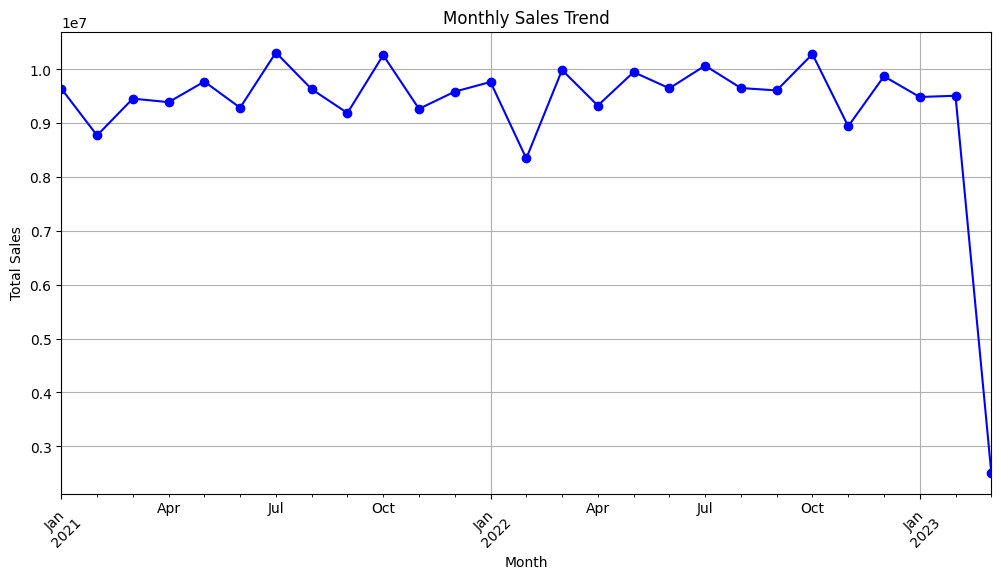

In [42]:
# Visualizing sales data over time
df['month'] = df['invoice_date'].dt.to_period('M')
monthly_sales = df.groupby('month')['total_price'].sum()

import matplotlib.pyplot as plt  
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### Insights
* Sales remain consistent over time, with small fluctuations.
* There is a sudden drop in the last recorded month, which might be due to missing or incomplete data.
* Business Impact: Identifying seasonal trends (e.g., holiday sales) could help in demand forecasting and stock management.


C:\Users\mehta\AppData\Local\Temp\ipykernel_18808\3347052043.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="Blues_r")


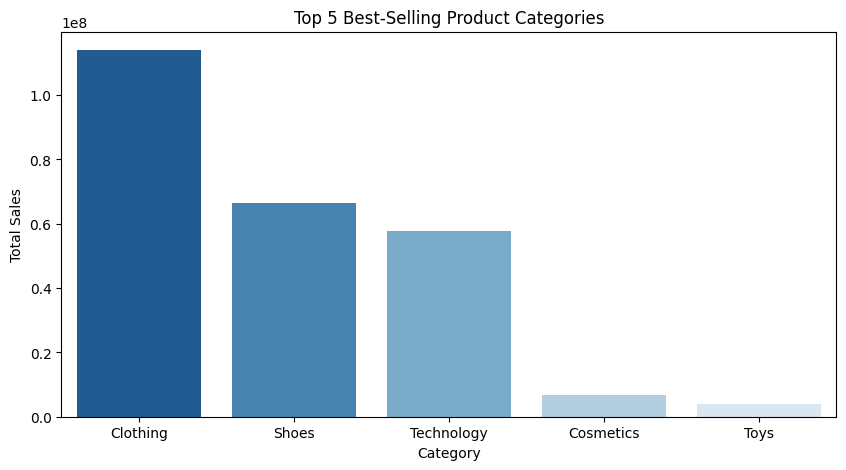

In [43]:
import seaborn as sns

top_categories = df.groupby('category')['total_price'].sum().nlargest(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="Blues_r")
plt.title('Top 5 Best-Selling Product Categories')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

#### Insights
* Clothing is the highest-selling category, followed by Shoes and Technology.
* Cosmetics and Toys have significantly lower sales.
* Business Impact: More inventory and promotional efforts should be directed toward Clothing and Shoes, while Toys and Cosmetics may need better marketing strategies or bundling promotions.

C:\Users\mehta\AppData\Local\Temp\ipykernel_18808\3899918316.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_spending.index, y=age_spending.values, palette="Blues")


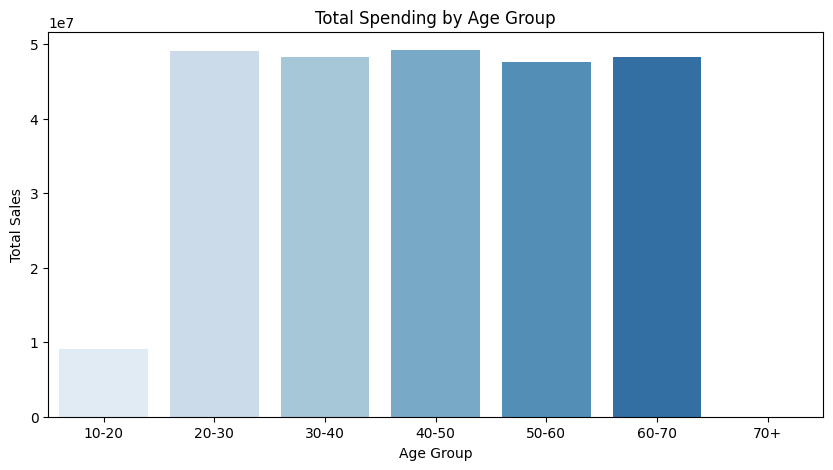

In [44]:
age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

age_spending = df.groupby('age_group')['total_price'].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=age_spending.index, y=age_spending.values, palette="Blues")
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.show()

#### Insights
* The 20-70 age range contributes the most to sales.
* Spending is lowest in the 10-20 age group, possibly due to lower purchasing power or preferences for budget-friendly options.
* Business Impact: Marketing campaigns should target the 20-70 age group with promotions and loyalty programs.

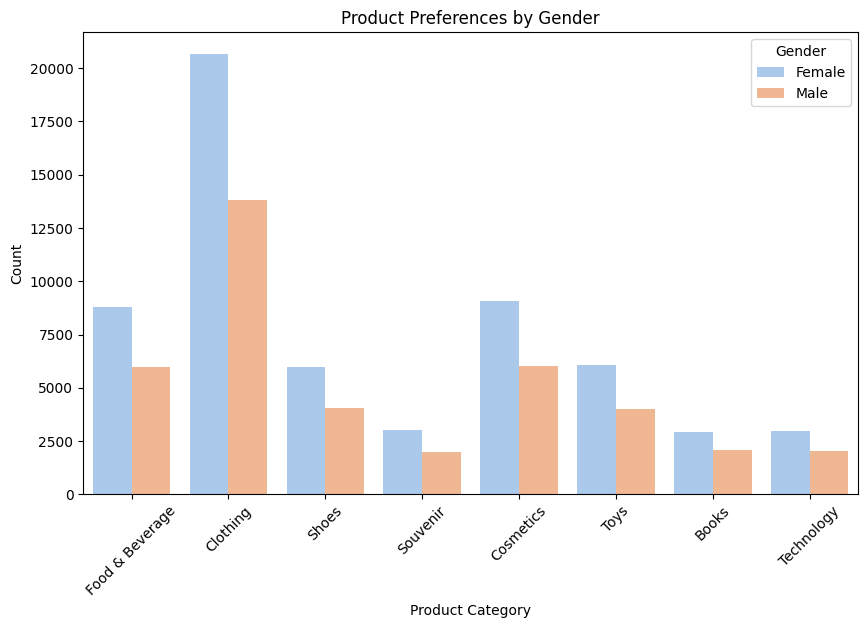

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category', hue='gender', palette='pastel')
plt.title('Product Preferences by Gender')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title="Gender")
plt.show()


C:\Users\mehta\AppData\Local\Temp\ipykernel_18808\1234487204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="muted")


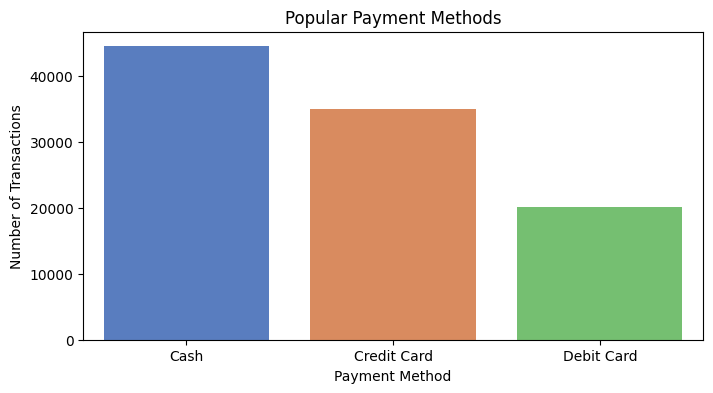

In [27]:
payment_counts = df['payment_method'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="muted")
plt.title('Popular Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()


#### Insights
* Cash is the most frequently used payment method, followed by Credit Card and then Debit Card.
* This suggests that customers prefer cash transactions over digital payments, which could be due to local preferences, store policies, or lack of access to digital payment options.
* Business Impact: Offering cash discounts or promoting digital payments with incentives might encourage more Credit/Debit card transactions.

In [47]:
df.dtypes

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
total_price              float64
month                  period[M]
age_group               category
dtype: object

19:20:00 - cmdstanpy - INFO - Chain [1] start processing
19:20:00 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x500 with 0 Axes>

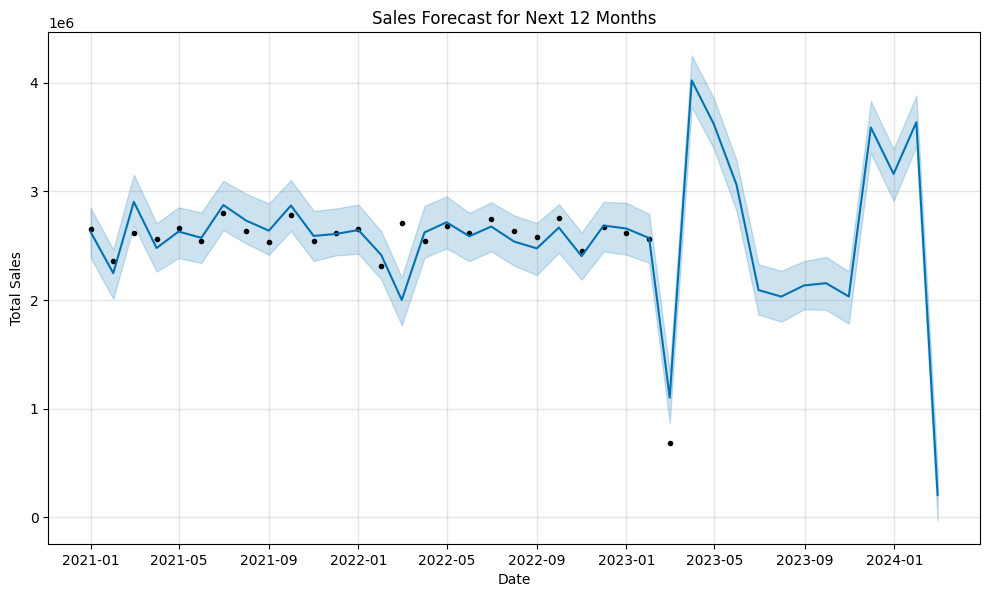

,ds,yhat,yhat_lower,yhat_upper
27,2023-03-31,4.021254e+06,3.777575e+06,4.251909e+06
28,2023-04-30,3.621345e+06,3.395221e+06,3.859538e+06
29,2023-05-31,3.062239e+06,2.821384e+06,3.287802e+06
30,2023-06-30,2.092395e+06,1.866621e+06,2.329019e+06
31,2023-07-31,2.032238e+06,1.801403e+06,2.269699e+06
32,2023-08-31,2.134991e+06,1.915069e+06,2.359022e+06
33,2023-09-30,2.155691e+06,1.910377e+06,2.397296e+06
34,2023-10-31,2.033473e+06,1.784052e+06,2.264687e+06
35,2023-11-30,3.588650e+06,3.353089e+06,3.831699e+06
36,2023-12-31,3.161581e+06,2.913308e+06,3.388609e+06


In [48]:
# Prophet forecasting

# Aggregate sales data by month
df_monthly_sales = df.groupby(df['invoice_date'].dt.to_period('M'))['price'].sum().reset_index()
df_monthly_sales['invoice_date'] = df_monthly_sales['invoice_date'].astype(str)
df_monthly_sales['invoice_date'] = pd.to_datetime(df_monthly_sales['invoice_date'])

# Rename columns for Prophet
df_monthly_sales.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_monthly_sales)

# Create future dates for forecasting
future = model.make_future_dataframe(periods=12, freq='M')

# Predict future sales
forecast = model.predict(future)

# Plot the forecast
plt.figure(figsize=(10, 5))
model.plot(forecast)
plt.title("Sales Forecast for Next 12 Months")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# Save forecasted data for review
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

#### Overall Insights

* Sales Trends: Sales show a strong seasonal pattern, with peaks and dips at regular intervals.
The sales forecast indicates an overall steady trend except for one major dip.

* Significant Drops & Peaks: There’s an unexpected drop in February 2024 (possibly due to external factors like seasonality or promotions).
Large sales spikes are observed in March and November, likely driven by marketing campaigns or seasonal demand.

* Business Implications: Plan promotions around months where a dip is predicted.
Prepare for high sales months to prevent stock shortages.
 The unusual drop in February 2024 might need investigation (e.g., missing data, external factors).